# Задание 1

Сгенерируйте 3 матрицы NUMPY из 1 млн. строк, содержащих 4 столбца – пол, возраст (от 16 до 66 лет), доход (от 10 тыр до 200 тыр), профессия. В категориальной переменной профессия сделайте 3-4 категории, в переменной пол – 2, возраст и доход сделайте количественными, с типом INT. Для генерации этих столбцов используйте методы NP.RANDOM.NORMAL, NP.RANDOM.CHOICE. Перед генерацией каждой матрицы установите новые параметры генератора случайных чисел, с помощью NP.RANDOM.SEED(100), NP.RANDOM.SEED(200), NP.RANDOM.SEED(300).

In [ ]:
import numpy as np
import pandas as pd

n = 1_000_000

matrix1 = pd.DataFrame({
    'sex': np.random.choice(['Муж', 'Жен'], size = n),
    'age': np.array(np.random.normal(41, 8, size=1000000), dtype=np.int8),
    'income': np.array(np.random.normal(105000, 31000, size=1000000), dtype=np.uint32),
    'professions': np.random.choice(['дворник', 'уборщик', 'няня', 'кассир'], size=n)
}).to_numpy()

matrix2 = pd.DataFrame({
    'sex': np.random.choice(['Муж', 'Жен'], size = n),
    'age': np.array(np.random.normal(41, 8, size=1000000), dtype=np.int8),
    'income': np.array(np.random.normal(105000, 31000, size=1000000), dtype=np.uint32),
    'professions': np.random.choice(['дворник', 'уборщик', 'няня', 'кассир'], size=n)
}).to_numpy()

matrix3 = pd.DataFrame({
    'sex': np.random.choice(['Муж', 'Жен'], size = n),
    'age': np.array(np.random.normal(41, 8, size=1000000), dtype=np.int8),
    'income': np.array(np.random.normal(105000, 31000, size=1000000), dtype=np.uint32),
    'professions': np.random.choice(['дворник', 'уборщик', 'няня', 'кассир'], size=n)
}).to_numpy()

matrix1[:5], matrix2[:5], matrix3[:5]

(array([['Жен', 32, 115351, 'дворник'],
        ['Жен', 33, 73212, 'кассир'],
        ['Жен', 36, 112725, 'дворник'],
        ['Жен', 40, 66860, 'кассир'],
        ['Муж', 31, 80346, 'кассир']], dtype=object),
 array([['Муж', 41, 70710, 'уборщик'],
        ['Жен', 31, 128525, 'уборщик'],
        ['Муж', 29, 90205, 'дворник'],
        ['Жен', 34, 48126, 'няня'],
        ['Муж', 42, 113343, 'кассир']], dtype=object),
 array([['Жен', 54, 133447, 'кассир'],
        ['Муж', 37, 63196, 'дворник'],
        ['Жен', 39, 108064, 'няня'],
        ['Муж', 44, 113736, 'кассир'],
        ['Жен', 37, 186892, 'кассир']], dtype=object))

# Задание 2

Установите PySpark и подключитесь к локальному кластеру Spark.

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

In [ ]:
!pip install -q findspark

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

#3 Задание

На основе матриц создайте RDD, Dataset, Dataframe и запишите их на диск, в форматах CSV, JSON, PARQUET. Код создания этих структур данных и сохранения в каждом формате, поместите в отдельные ячейки кода Jupiter и замерьте время записи на диск с помощью команды %t%timeit.

In [ ]:
columns = ['sex', 'age', 'income', 'professions']

In [ ]:
rdd1 = spark.sparkContext.parallelize([tuple(row) for row in matrix1])
rdd_df1 = rdd1.toDF(columns)
%timeit rdd_df1.write.csv('csv_rdd/rdd_1.csv', mode='overwrite')
%timeit rdd_df1.write.json('output_rdd/rdd_1.json', mode='overwrite')
%timeit rdd_df1.write.parquet('output_rdd/rdd_1.parquet', mode='overwrite')
del rdd1, rdd_df1

5.27 s ± 728 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.03 s ± 558 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.75 s ± 936 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
rdd2 = spark.sparkContext.parallelize([tuple(row) for row in matrix2])
rdd_df2 = rdd2.toDF(columns)
%timeit rdd_df2.write.csv('csv_rdd/rdd_2.csv', mode='overwrite')
%timeit rdd_df2.write.json('output_rdd/rdd_2.json', mode='overwrite')
%timeit rdd_df2.write.parquet('output_rdd/rdd_2.parquet', mode='overwrite')
del rdd2, rdd_df2

5.8 s ± 785 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.39 s ± 1.04 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.65 s ± 701 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
rdd3 = spark.sparkContext.parallelize([tuple(row) for row in matrix3])
rdd_df3 = rdd3.toDF(columns)
%timeit rdd_df3.write.csv('csv_rdd/rdd_3.csv', mode='overwrite')
%timeit rdd_df3.write.json('output_rdd/rdd_3.json', mode='overwrite')
%timeit rdd_df3.write.parquet('output_rdd/rdd_3.parquet', mode='overwrite')
del rdd3, rdd_df3

4.96 s ± 628 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.91 s ± 580 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
5.06 s ± 533 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df1 = spark.createDataFrame(matrix1, columns)
%timeit df1.write.csv('csv_df/df1_output.csv', mode='overwrite')
%timeit df1.write.json('output_df/df1_output.json', mode='overwrite')
%timeit df1.write.parquet('output_df/df1_output.parquet', mode='overwrite')
del df1

4.36 s ± 1.12 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.97 s ± 555 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.8 s ± 489 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df2 = spark.createDataFrame(matrix2, columns)
%timeit df2.write.csv('csv_df/df2_output.csv', mode='overwrite')
%timeit df2.write.json('output_df/df2_output.json', mode='overwrite')
%timeit df2.write.parquet('output_df/df2_output.parquet', mode='overwrite')
del df2

3.97 s ± 496 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4 s ± 500 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.69 s ± 576 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df3 = spark.createDataFrame(matrix3, columns)
%timeit df3.write.csv('csv_df/df3_output.csv', mode='overwrite')
%timeit df3.write.json('output_df/df3_output.json', mode='overwrite')
%timeit df3.write.parquet('output_df/df3_output.parquet', mode='overwrite')
del df3

4.02 s ± 597 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.9 s ± 611 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.71 s ± 439 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#4 Задание

Считайте полученные файлы с диска в новые RDD, Dataset, Dataframe в отдельных ячейках кода Jupiter и замерьте время чтения для каждой комбинации (формат файластруктура данных) с помощью команды %t%timeit.

In [ ]:
%timeit rdd = spark.read.csv('output_df/df1_output.csv').rdd
%timeit rdd = spark.read.csv('output_df/df1_output.csv').rdd
%timeit rdd = spark.read.csv('output_df/df1_output.csv').rdd
print()
%timeit rdd = spark.read.json('output_rdd/rdd_1.json').rdd
%timeit rdd = spark.read.json('output_rdd/rdd_2.json').rdd
%timeit rdd = spark.read.json('output_rdd/rdd_3.json').rdd
print()
%timeit rdd = spark.read.parquet('output_rdd/rdd_1.parquet').rdd
%timeit rdd = spark.read.parquet('output_rdd/rdd_2.parquet').rdd
%timeit rdd = spark.read.parquet('output_rdd/rdd_3.parquet').rdd

417 ms ± 46.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
224 ms ± 57.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
158 ms ± 36.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

1.64 s ± 474 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.53 s ± 330 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.39 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

143 ms ± 32.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
90.8 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
105 ms ± 20.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%timeit df = spark.read.csv('output_df/df1_output.csv')
%timeit df = spark.read.csv('output_df/df2_output.csv')
%timeit df = spark.read.csv('output_df/df3_output.csv')
print()
%timeit df = spark.read.json('output_df/df1_output.json')
%timeit df = spark.read.json('output_df/df2_output.json')
%timeit df = spark.read.json('output_df/df3_output.json')
print()
%timeit df = spark.read.parquet('output_df/df1_output.parquet')
%timeit df = spark.read.parquet('output_df/df2_output.parquet')
%timeit df = spark.read.parquet('output_df/df3_output.parquet')

97.9 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
104 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
85.9 ms ± 5.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

1.49 s ± 309 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.48 s ± 270 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.57 s ± 336 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

61.4 ms ± 1.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
75.5 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.3 ms ± 6.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#5 Задание

Заполните сравнительную таблицу:

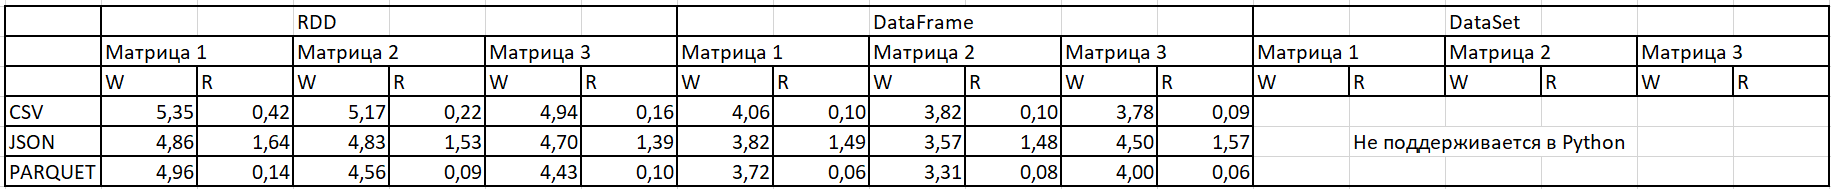

п.с. ячейки перезапускал несколько раз, поэтому значения могут отличаться, но они сходятся по порядку величины и лежат в пределах погрешности.

#6 Задание

Задания на I/O и создание структур данных

6.1 Cчитайте все файлы CSV одной командой и получите файл RDD.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

schema = StructType([
    StructField("sex", StringType(), True),
    StructField("age", IntegerType(), True),
    StructField("income", IntegerType(), True),
    StructField("professions", StringType(), True)
])

In [ ]:
rdd = spark.sparkContext.textFile('csv_rdd/*')
rdd_tuples = rdd.map(lambda x: tuple(x.split(",")))

6.2 Создайте датафрейм из полученного RDD. Здесь и далее задания относятся к нему.

In [ ]:
df = rdd_tuples.toDF(columns)

#7 Задание

Задания на просмотр содержимого и фильтрацию Dataframe

7.1 Выведите схему датафрейма

In [ ]:
df.printSchema()

root
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- income: string (nullable = true)
 |-- professions: string (nullable = true)



7.2 Выведите топ 10 записей датафрейма

In [ ]:
df.show(10)

+---+---+------+-----------+
|sex|age|income|professions|
+---+---+------+-----------+
|Жен| 34|109327|       няня|
|Муж| 37|115216|     кассир|
|Жен| 35|107683|     кассир|
|Муж| 49|135768|     кассир|
|Жен| 46| 97503|       няня|
|Жен| 48| 96279|    дворник|
|Муж| 27| 72351|     кассир|
|Жен| 46| 93684|    дворник|
|Жен| 35|157692|     кассир|
|Жен| 51|120668|       няня|
+---+---+------+-----------+
only showing top 10 rows



7.3 Отберите строки c возрастом от 25 до 50.

In [ ]:
df.filter((df.age > 25)&(df.age <= 50)).show()

+---+---+------+-----------+
|sex|age|income|professions|
+---+---+------+-----------+
|Жен| 34|109327|       няня|
|Муж| 37|115216|     кассир|
|Жен| 35|107683|     кассир|
|Муж| 49|135768|     кассир|
|Жен| 46| 97503|       няня|
|Жен| 48| 96279|    дворник|
|Муж| 27| 72351|     кассир|
|Жен| 46| 93684|    дворник|
|Жен| 35|157692|     кассир|
|Жен| 42|141531|     кассир|
|Муж| 44|156274|     кассир|
|Жен| 32| 59437|    уборщик|
|Муж| 32| 62040|    дворник|
|Муж| 39| 78967|    дворник|
|Жен| 37| 68964|       няня|
|Жен| 50| 99727|     кассир|
|Жен| 32| 97205|    дворник|
|Жен| 31|101230|       няня|
|Жен| 31| 23166|     кассир|
|Муж| 41| 66521|     кассир|
+---+---+------+-----------+
only showing top 20 rows



7.4 Отберите столбцы Возраст и Профессия.

In [ ]:
df.select('age','professions').show()

+---+-----------+
|age|professions|
+---+-----------+
| 34|       няня|
| 37|     кассир|
| 35|     кассир|
| 49|     кассир|
| 46|       няня|
| 48|    дворник|
| 27|     кассир|
| 46|    дворник|
| 35|     кассир|
| 51|       няня|
| 42|     кассир|
| 44|     кассир|
| 54|     кассир|
| 32|    уборщик|
| 32|    дворник|
| 39|    дворник|
| 24|     кассир|
| 37|       няня|
| 50|     кассир|
| 32|    дворник|
+---+-----------+
only showing top 20 rows



#8 Задание

Задания на статистику и агрегацию

8.1  Рассчитайте среднее по столбцу Доход, и максимум по столбцу Возраст

In [ ]:
from pyspark.sql import functions as f
df = df.withColumn("income", df["income"].cast(IntegerType()))
df = df.withColumn("age", df["age"].cast(IntegerType()))
df.select(f.mean("income"), f.max("age")).show()

+------------------+--------+
|       avg(income)|max(age)|
+------------------+--------+
|105029.22400040548|      80|
+------------------+--------+



8.2  Сгруппируйте датафрейм по столбцам Пол и Профессия и рассчитайте максимальный доход в каждой группе

In [ ]:
df.groupby('sex','professions').agg(f.max("income")).show()

+---+-----------+-----------+
|sex|professions|max(income)|
+---+-----------+-----------+
|Жен|    дворник|     251367|
|Жен|     кассир|     242342|
|Муж|    уборщик|     253324|
|Муж|     кассир|     256393|
|Муж|    дворник|     246638|
|Жен|       няня|     250572|
|Жен|    уборщик|     248421|
|Муж|       няня|     253787|
+---+-----------+-----------+



8.3 Постройте сводную таблицу Пол, Профессия с частотами респондентов в ячейках.

In [ ]:
df.groupby('professions').pivot('sex').agg(f.count('sex') / df.count()).show()

+-----------+-------------------+-------------------+
|professions|                Жен|                Муж|
+-----------+-------------------+-------------------+
|     кассир|           0.125041|0.12498433333333334|
|    дворник|0.12491966666666666|            0.12507|
|       няня|           0.124891|0.12487033333333333|
|    уборщик|           0.125193|0.12503066666666668|
+-----------+-------------------+-------------------+



#9 Задание

Задания на преобразования

9.1 Добавьте производный столбец Доход/Возраст

In [ ]:
df2 = df.withColumn('Доход/Возраст', df.income / df.age)
df2.show(5)

+---+---+------+-----------+------------------+
|sex|age|income|professions|     Доход/Возраст|
+---+---+------+-----------+------------------+
|Жен| 34|109327|       няня|            3215.5|
|Муж| 37|115216|     кассир| 3113.945945945946|
|Жен| 35|107683|     кассир| 3076.657142857143|
|Муж| 49|135768|     кассир|2770.7755102040815|
|Жен| 46| 97503|       няня|2119.6304347826085|
+---+---+------+-----------+------------------+
only showing top 5 rows



9.2 Переименуйте новый столбец в Руб/лет

In [ ]:
df2 = df2.withColumnRenamed('Доход/Возраст', "Руб/лет")
df2.show(5)

+---+---+------+-----------+------------------+
|sex|age|income|professions|           Руб/лет|
+---+---+------+-----------+------------------+
|Жен| 34|109327|       няня|            3215.5|
|Муж| 37|115216|     кассир| 3113.945945945946|
|Жен| 35|107683|     кассир| 3076.657142857143|
|Муж| 49|135768|     кассир|2770.7755102040815|
|Жен| 46| 97503|       няня|2119.6304347826085|
+---+---+------+-----------+------------------+
only showing top 5 rows



9.3 Удалите новый столбец

In [ ]:
df2 = df2.drop('Руб/лет')
df2.show(5)

+---+---+------+-----------+
|sex|age|income|professions|
+---+---+------+-----------+
|Жен| 34|109327|       няня|
|Муж| 37|115216|     кассир|
|Жен| 35|107683|     кассир|
|Муж| 49|135768|     кассир|
|Жен| 46| 97503|       няня|
+---+---+------+-----------+
only showing top 5 rows



9.4 Удалите строки с возрастом респондентов меньше 18 лет.

In [ ]:
df2 = df2.filter(df2.age >= 18)
df2.show(5)
print(df2.count())

+---+---+------+-----------+
|sex|age|income|professions|
+---+---+------+-----------+
|Жен| 34|109327|       няня|
|Муж| 37|115216|     кассир|
|Жен| 35|107683|     кассир|
|Муж| 49|135768|     кассир|
|Жен| 46| 97503|       няня|
+---+---+------+-----------+
only showing top 5 rows

2993946


#10 Задание

Задания на машинное обучение

10.1 Подготовьте исходные данные, в качестве признаков используя Пол, Возраст, Профессию, а в качестве отклика – Доход. Используйте объект VectorAssembler из модуля pyspark.ml.feature для создания схемы данных, и его метод transform для преобразования исходных данных.

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
df2 = df2.withColumn('sex_b', df.sex).replace('Жен', '1', 'sex_b').replace('Муж', '0', 'sex_b')
df2 = df2.withColumn('sex_b', df2.sex_b.cast(IntegerType()))

df2 = df2.withColumn('prof_n', df.professions).replace('няня', '1', 'prof_n').replace('кассир', '2', 'prof_n').replace('дворник', '3', 'prof_n').replace('уборщик', '0', 'prof_n')
df2 = df2.withColumn('prof_n', df2.prof_n.cast(IntegerType()))

assembler = VectorAssembler(inputCols=["sex_b", "prof_n", "age"], outputCol="features")
data = df2.select('sex_b', 'prof_n', 'age', 'income')
data = assembler.transform(data)

10.2 Разделите полученные данные на тестовую (20%) и обучающую (80%) выборки. Используйте метод randomSplit, относящийся к полученному объекту данных из п.10.1

In [ ]:
data2 = data2.withColumnRenamed('income', 'label')
data2 = data2.select("features", "label")
data2 = data2.dropna()

train_data, test_data = data2.randomSplit([0.8, 0.2], seed=1000)

10.3 Обучите модель множественной линейной регрессии. Используйте объект LinearRegression из модуля pyspark.ml.regression.

In [ ]:
linear = LinearRegression()
model = linear.fit(train_data)

10.4 Рассчитайте метрики качества RMSE, MAE, R2 для тестовой выборки и выведите их на печать. Используйте объект RegressionEvaluator из модуля pyspark.ml.evaluation.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

prediction = model.transform(test_data)

evaluator_rmse = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
evaluator_mae = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="mae")
evaluator_r2 = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="r2")

rmse = evaluator_rmse.evaluate(prediction)
mae = evaluator_mae.evaluate(prediction)
r2 = evaluator_r2.evaluate(prediction)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 30934.704073218032
MAE: 24715.941077653963
R²: -2.2800316299420587e-06
